# Principal Component Analysis (PCA)

- PCA is a linear dimensionality reduction technique. It transforms a set of correlated variables (p) into a smaller k (k<p) number of uncorrelated variables called principal components while retaining as much of the variation in the original dataset as possible.

- The main concept behind the PCA is to consider the correlation among features. If the correlation is very high among a subset of the features, PCA will attempt to combine the highly correlated features and represent this data with a smaller number of linearly uncorrelated features. The algorithm keeps performing this correlation reduction, finding the directions of maximum variance in the original high-dimensional data and projecting them onto a smaller dimensional space. These newly derived components are known as principal components.

- With these components, it is possible to reconstruct the original features — not exactly but generally close enough. The PCA algorithm actively attempts to minimize the reconstruction error during its search for the optimal components.

- By reducing the dimensionality of the data, PCA will reduce the size of the data improving the performance of machine learning algorithms.

- PCA is an unsupervised technique, meaning that it does not use the information from the target vector and instead only considers the feature matrix.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer=load_breast_cancer()
df=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 30)

In [5]:
X=df.iloc[:,:]
y=cancer.target

# Feature Scaling
- It is essential to perform feature scaling before running PCA if there is a significant difference in the scale between the features of the dataset; for example, one feature ranges in values between 0 and 1 and another between 100 and 1,000. 
- PCA is very sensitive to the relative ranges of the original features. We can apply z-score standardization to get all features into the same scale by using Scikit-learn StandardScaler() class which is in the preprocessing submodule in Scikit-learn.

In [6]:
from  sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# Apply PCA
- In our breast_cancer dataset, the original feature space has 30 dimensions, known as p dimensions. PCA will project the data onto a smaller subspace of k dimensions (where k < p) while retaining as much of the variation as possible. These k dimensions are known as the principal components.

- By applying PCA, we lose some of the variance (i.e., information). By reducing the dimensionality of the data, PCA will reduce the size of the data.

- This will improve the performance of machine learning algorithms.
- This will reduce hardware requirements and speed up the training process.
- This will allow us to easily understand the underlying structure of the data.
- This will allow us to visualize the data on a 2d or 3d plot (if we choose the number of principal components as 2 or 3).

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca_30=PCA(n_components=30,random_state=42)

In [10]:
pca_30.fit_transform(X_scaled)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

In [11]:
print('Variance explained by all 30 comonents: ',sum(pca_30.explained_variance_ratio_*100))

Variance explained by all 30 comonents:  100.00000000000003


In [12]:
pca_30.explained_variance_ratio_*100

array([4.42720256e+01, 1.89711820e+01, 9.39316326e+00, 6.60213492e+00,
       5.49576849e+00, 4.02452204e+00, 2.25073371e+00, 1.58872380e+00,
       1.38964937e+00, 1.16897819e+00, 9.79718988e-01, 8.70537901e-01,
       8.04524987e-01, 5.23365745e-01, 3.13783217e-01, 2.66209337e-01,
       1.97996793e-01, 1.75395945e-01, 1.64925306e-01, 1.03864675e-01,
       9.99096464e-02, 9.14646751e-02, 8.11361259e-02, 6.01833567e-02,
       5.16042379e-02, 2.72587995e-02, 2.30015463e-02, 5.29779290e-03,
       2.49601032e-03, 4.43482743e-04])

In [13]:
np.cumsum(pca_30.explained_variance_ratio_*100)

array([ 44.27202561,  63.24320765,  72.63637091,  79.23850582,
        84.73427432,  88.75879636,  91.00953007,  92.59825387,
        93.98790324,  95.15688143,  96.13660042,  97.00713832,
        97.81166331,  98.33502905,  98.64881227,  98.91502161,
        99.1130184 ,  99.28841435,  99.45333965,  99.55720433,
        99.65711397,  99.74857865,  99.82971477,  99.88989813,
        99.94150237,  99.96876117,  99.99176271,  99.99706051,
        99.99955652, 100.        ])

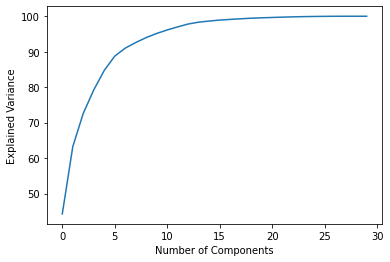

In [14]:
plt.plot(np.cumsum(pca_30.explained_variance_ratio_*100))
plt.xlabel("Number of Components")
plt.ylabel('Explained Variance')
plt.show()

In [15]:
print('Variance explained by First Principal Component: ',np.cumsum(pca_30.explained_variance_ratio_*100)[0])
print('Variance explained by First 2 Principal Components: ',np.cumsum(pca_30.explained_variance_ratio_*100)[1])
print('Variance explained by First 3 Principal Components: ',np.cumsum(pca_30.explained_variance_ratio_*100)[2])
print('Variance explained by First 4 Principal Components: ',np.cumsum(pca_30.explained_variance_ratio_*100)[3])
print('Variance explained by First 5 Principal Components: ',np.cumsum(pca_30.explained_variance_ratio_*100)[4])
print('Variance explained by First 10 Principal Components: ',np.cumsum(pca_30.explained_variance_ratio_*100)[9])

Variance explained by First Principal Component:  44.27202560752633
Variance explained by First 2 Principal Components:  63.24320765155943
Variance explained by First 3 Principal Components:  72.6363709089908
Variance explained by First 4 Principal Components:  79.23850582446096
Variance explained by First 5 Principal Components:  84.73427431680723
Variance explained by First 10 Principal Components:  95.15688143366668


# Apply PCA by setting n_components=2

In [16]:
pca_2=PCA(n_components=2,random_state=42)

In [17]:
x_pca_2=pca_2.fit_transform(X_scaled)
x_pca_2

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [18]:
print('Variance explained by First 2 Principal Components: ',sum(pca_2.explained_variance_ratio_*100))

Variance explained by First 2 Principal Components:  63.24320765155945


In [19]:
pca_2.explained_variance_ratio_*100

array([44.27202561, 18.97118204])

In [20]:
np.cumsum(pca_2.explained_variance_ratio_*100)

array([44.27202561, 63.24320765])

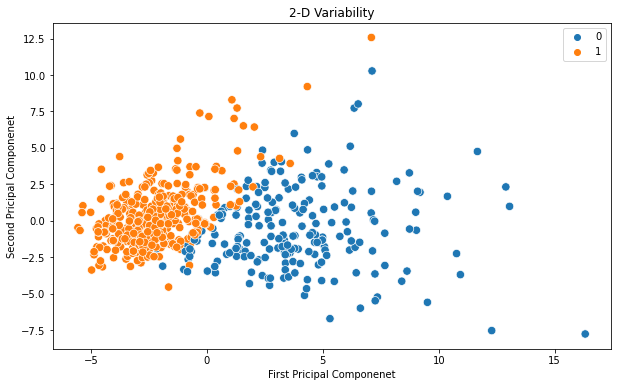

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_pca_2[:,0],y=x_pca_2[:,1],s=70,hue=cancer.target)
plt.title('2-D Variability')
plt.xlabel('First Pricipal Componenet')
plt.ylabel('Second Pricipal Componenet');

In [22]:
#from yellowbrick.features import PCA

In [23]:
# visualizer_2=PCA(scale=True,projection=2,classes=['maligant','benign'],random_state=42,colors=['red','blue'])
# visualizer_2.fit_transform(X,cancer.target)
# plt.title('Principal Component Plot')
# plt.xlabel('PC1')
# plt.ylabel('PC2');

# Apply PCA by setting n_components=3

In [37]:
pca_3=PCA(n_components=3,random_state=42)
x_pca_3=pca_3.fit_transform(X_scaled)
x_pca_3

array([[ 9.19283683,  1.94858333, -1.12316483],
       [ 2.3878018 , -3.76817147, -0.52929058],
       [ 5.73389628, -1.07517381, -0.55174723],
       ...,
       [ 1.25617928, -1.90229684,  0.56272972],
       [10.37479406,  1.67200998, -1.87702989],
       [-5.4752433 , -0.6706363 ,  1.49044698]])

In [26]:
print('Variance explained by First 3 Principal Components: ',sum(pca_3.explained_variance_ratio_*100))

Variance explained by First 3 Principal Components:  72.63637090898547


In [27]:
pca_3.explained_variance_ratio_*100

array([44.27202561, 18.97118204,  9.39316326])

In [28]:
np.cumsum(pca_3.explained_variance_ratio_*100)

array([44.27202561, 63.24320765, 72.63637091])

In [29]:
from mpl_toolkits import mplot3d

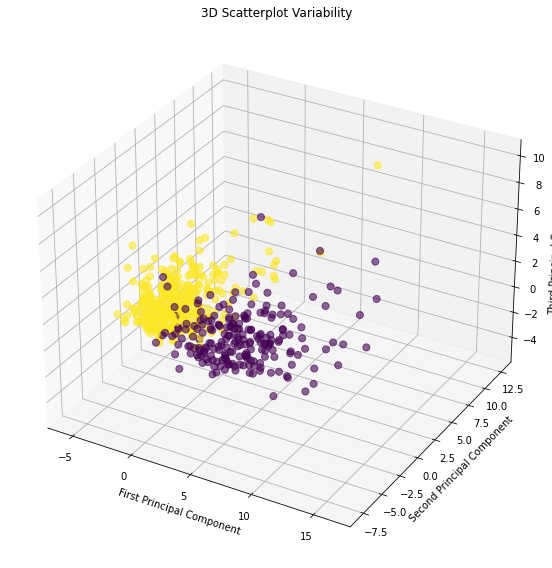

In [49]:
fig=plt.figure(figsize=(12,8))
ax=plt.axes(projection='3d')
ax.scatter3D(x_pca_3[:,0],x_pca_3[:,1],x_pca_3[:,2],c=cancer.target,s=50,alpha=0.6)
plt.title('3D Scatterplot Variability')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.tight_layout();

In [ ]:
# visualizer_3=PCA(scale=True,projection=3,classes=['maligant','benign'],random_state=42,colors=['red','blue'])
# visualizer_3.fit_transform(X,cancer.target)
# plt.title('Principal Component Plot')
# plt.xlabel('PC1')
# plt.ylabel('PC2');
# plt.zlabel('PC3');

# Apply PCA by setting n_components=0.95

- Let’s apply PCA to our dataset with n_components=0.95. This will select the number of components while preserving 95% of the variability in the data.

In [36]:
pca_95=PCA(n_components=0.95,random_state=42)
x_pca_95=pca_95.fit_transform(X_scaled)
x_pca_95

array([[ 9.19283683,  1.94858307, -1.12316616, ..., -0.39840723,
        -0.15711836, -0.87740188],
       [ 2.3878018 , -3.76817174, -0.52929269, ...,  0.24098846,
        -0.71190482,  1.10699494],
       [ 5.73389628, -1.0751738 , -0.55174759, ...,  0.09737374,
         0.02406564,  0.4542754 ],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ...,  0.34188704,
         0.39391682,  0.52087738],
       [10.37479406,  1.67201011, -1.87702933, ..., -0.28023861,
        -0.54203454, -0.08929612],
       [-5.4752433 , -0.67063679,  1.49044308, ...,  1.04635352,
         0.37410111, -0.04772557]])

In [38]:
x_pca_95.shape

(569, 10)

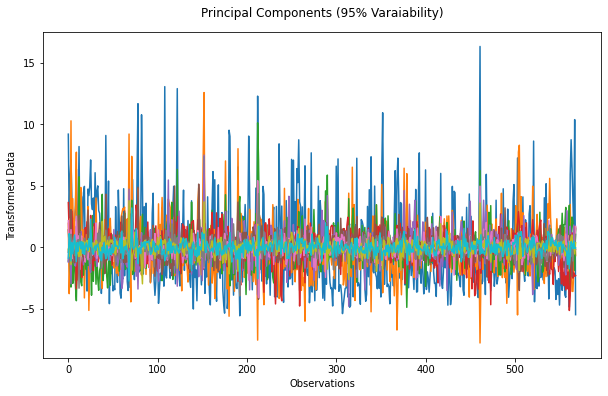

In [43]:
plt.figure(figsize=(10,6))
plt.plot(x_pca_95)
plt.title('Principal Components (95% Varaiability)',pad=15)
plt.xlabel('Observations')
plt.ylabel('Transformed Data');

In [47]:
df_new=pd.DataFrame(x_pca_95,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
df_new['label']=cancer.target
df_new

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0
...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,0
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,0
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,0
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,0


In [48]:
df_new.shape

(569, 11)

- When we compare with the original dataset that has 30 features, this contains only 10 features, but with 95% of the variability in data. 